### Imports

In [610]:
import sys
!{sys.executable} -m pip install  --ignore-installed --upgrade pip==21.3.1
import pip

!pip install pymysql
import pymysql

import pandas as pd
!pip install lxml
!pip install Corpora
!pip install requests
!pip install beautifulsoup4
!pip install TextBlob
!pip install wordcloud
import requests
from bs4 import BeautifulSoup


import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')


  Using cached pip-21.3.1-py3-none-any.whl (1.7 MB)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shabina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shabina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shabina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Shabina\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [611]:
!pip install mysql
!pip3 install mysql-connector-python
!pip install mysql-connector-python
!pip install textblob
!pip install seaborn
!pip install missingno

  Using cached mysql-0.0.3-py3-none-any.whl (1.2 kB)
  Using cached mysqlclient-2.1.1.tar.gz (88 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for mysqlclient
Failed to build mysqlclient
    Running setup.py install for mysqlclient: started
    Running setup.py install for mysqlclient: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Shabina\.conda\envs\python-cvcourse\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Shabina\\AppData\\Local\\Temp\\pip-install-5mgtccqp\\mysqlclient_32cb1873604644c5956d0f99fd5b676b\\setup.py'"'"'; __file__='"'"'C:\\Users\\Shabina\\AppData\\Local\\Temp\\pip-install-5mgtccqp\\mysqlclient_32cb1873604644c5956d0f99fd5b676b\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Shabina\AppData\Local\Temp\pip-wheel-_6r92weu'
       cwd: C:\Users\Shabina\AppData\Local\Temp\pip-install-5mgtccqp\mysqlclient_32cb1873604644c5956d0f99fd5b676b\
  Complete output (23 lines):
  running bdist_wheel
  running build
  running build_py
  creating build


In [612]:
import mysql.connector

In [613]:
import numpy as np 
import pandas as pd 
import string
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import os
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
import glob
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


import matplotlib.pyplot as plt
%matplotlib inline
from textblob import Word
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

import sqlite3
import re
import mysql 
from textblob import TextBlob


In [614]:
def textCleaning(df):
    ## Lower case
    df['description'] = df['description'].apply(lambda x: " ".join(x.lower()for x in x.split()))
    
    ## remove tabulation and punctuation
    df['description'] = df['description'].str.replace('[^\w\s]',' ')

    #remove stop words
    stop = stopwords.words('english')
    df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

    ## lemmatization
    df['description'] = df['description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

### Read data from csv file

In [615]:
job_df = pd.read_csv('C:\MIS_NEU\Assignments\DMDD\MakeMyCareer\Assignment4\jobs_data.csv' , keep_default_na=False)
job_df.drop(columns = job_df.columns[0], axis = 1, inplace= True)
job_df = job_df.dropna(how='all')

textCleaning(job_df)
aggregate = job_df.groupby(['job_title']).sum().reset_index()

other_stop_words = ['junior', 'senior','experience','etc','job','work','company','technique',
                    'candidate','skill','skills','language','menu','inc','new','plus','years',
                   'technology','organization','ceo','cto','account','manager','data','scientist','mobile',
                    'developer','product','revenue','strong']

job_df['description'] = job_df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in other_stop_words))
job_df.head()

,job_title,industry,company,description,job_locality,job_region,skills,job_post_expiry,education_requirements,base_salary_min,base_salary_max,base_salary_currency,url
0,Data Scientist Internship - OR (US),Insurance,Asurion,2022 75202asurion science internship ornashvil...,Nashville,TN,,2023-01-04T03:56:32.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/data-scient...
1,Intern - Data Scientist,Medical Equipment Manufacturing,Dexcom,dexcomdexcom empowers people take control diab...,United States,,,2023-01-08T04:50:37.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/intern-data...
2,"Data Science, Graduate Internship",Retail,"Lowe's Companies, Inc.",lowe summer internship program overviewlowe 20...,Charlotte,NC,,2023-01-09T14:48:39.000Z,,,,,https://www.linkedin.com/jobs/view/data-scienc...
3,Data Scientist Internship - ML (US),Insurance,Asurion,2022 75205asurion science internship mlnashvil...,Nashville,TN,,2023-01-04T03:56:32.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/data-scient...
4,Data Science Intern,Manufacturing,Nestlé Purina North America,leader pet care industry mean ahead volume pro...,St Louis,MO,,2023-01-05T20:57:11.000Z,,,,,https://www.linkedin.com/jobs/view/data-scienc...


### Train MultinomialNB for skills based on job title

In [616]:
## Converting text to features 
vectorizer = TfidfVectorizer()
#Tokenize and build vocabulary
X = vectorizer.fit_transform(job_df.description)
y = job_df.job_title

# split data into 80% training and 20% job_df
X_train, X_job_df, y_train, y_job_df = train_test_split(X, y, test_size=0.2,random_state=109) 
print("train data shape: ",X_train.shape)
print("job_df data shape: ",X_job_df.shape)

# Fit model
clf = MultinomialNB()
clf.fit(X_train, y_train)
## Predict
y_predicted = clf.predict(X_job_df)

train data shape:  (2348, 33133)
job_df data shape:  (587, 33133)


### Extract Skills from job description

In [617]:
nltk.download('averaged_perceptron_tagger')
technical_skills = ['python', 'c','r', 'c++','java','hadoop','scala','flask','pandas','spark','scikit-learn',
                    'numpy','php','sql','mysql','css','mongdb','nltk','fastai' , 'keras', 'pytorch','tensorflow',
                   'linux','Ruby','JavaScript','django','react','reactjs','ai','ui','tableau']
feature_array = vectorizer.get_feature_names()
print(feature_array)
# number of overall model features
features_numbers = len(feature_array)
## max sorted features number
n_max = int(features_numbers * 0.1)

##initialize output dataframe
output = pd.DataFrame()
for i in range(0,len(clf.classes_)):
    print("\n****" ,clf.classes_[i],"****\n")
    class_prob_indices_sorted = clf.feature_log_prob_[i, :].argsort()[::-1]
    skills = np.take(feature_array, class_prob_indices_sorted[:n_max])  
    ## Extract technical skills
    top_technical_skills= list(set(technical_skills).intersection(skills))[:6]    
    # transform list to string
    txt = " ".join(skills)
    blob = TextBlob(txt)
    #top 6 adjective
    top_adjectives = [w for (w, pos) in TextBlob(txt).pos_tags if pos.startswith("JJ")][:6]
    
    output = output.append({'job_title':clf.classes_[i],
                        'technical_skills':top_technical_skills,
                        'soft_skills':top_adjectives },
                       ignore_index=True)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shabina\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['00', '000', '00010843', '000about', '000actual', '000bdsa', '000benefits', '000check', '000city', '000comprehensive', '000do', '000duties', '000eligible', '000k', '000life', '000location', '000maximum', '000new', '000our', '000please', '000powered', '000qualificationsqualifications', '000relocation', '000reports', '000s', '000salary', '000summarythe', '000the', '000we', '001', '002', '004', '00403closing2', '00435', '004working', '005', '00am', '00base', '00if', '00never', '00note', '00pay', '00pm', '00pmwill', '00posting', '00relocation', '00required', '00requirements', '00salary', '00target', '00the', '00what', '01', '01434duration', '01752', '019', '01asalary', '02', '02129primary', '021fax', '02210', '03', '030', '032', '04', '0433', '0455', '04clearance', '04location', '05', '0530direct', '0537', '05778indoj', '057union00', '06', '0644', '06511203', '06511work', '0657', '06945immediate', '07', '0727', '0740employment', '079', '07936description', '07completion', '07location', '07


**** (Level Up) Software Engineer I ****


**** (USA) 2023 Full Time: Sam's Club Data Scientist ****


**** 1161 - Test Engineer Intern ****


**** 2023 Intern - Software Engineer ****


**** 2023 Intern - Software Engineer, Machine Learning ****


**** 2023 Internship – Cybersecurity/Software Engineering Intern ****


**** 2023 Software Engineer Intern - Charlottesville, VA ****


**** 2023 Summer Corporate Internship Program, Python Developer, Technology ****


**** 2023 Summer Intern - Software Engineer [Slack] ****


**** 2023 Summer Intern - Software Engineer, US ****


**** 2023 Summer Intern Program Opportunities ****


**** 2023 Summer Internship - Hyperautomation Engineering Intern Job ****


**** 2023 Summer Internship - Software Developer - Sales Tool Platform Intern Job ****


**** 526948 (Data Analyst) ****


**** : AI &amp; ML Performance Engineer ****


**** AI and Machine Learning (ML) Performance Engineer ****


**** AI and Machine Learning Engineer ****


**** AI/ML 


**** Data Engineer I (AWS, Python) ****


**** Data Engineer I - ETL ****


**** Data Engineer II ****


**** Data Engineer Intern ****


**** Data Engineer Intern (Summer 2023) ****


**** Data Engineer Intern - Data Platform ****


**** Data Engineer Intern 2023 ****


**** Data Engineer Intern, Developer Experience ****


**** Data Engineer L5, Playback ****


**** Data Engineer Lead ****


**** Data Engineer Remote ****


**** Data Engineer with Python (Remote) ****


**** Data Engineer | $110,000 - $200,000 + Bonus + Stock Options | 100% USA-Remote ****


**** Data Engineer – Remote position – Up to $130k Base + 10% bonus! ****


**** Data Engineer, Commerce ****


**** Data Engineer, Data Platform ****


**** Data Engineer, Snowflake ****


**** Data Engineer, Web Scraping (Remote) ****


**** Data Engineer-External ****


**** Data Engineer-Full Time ****


**** Data Engineer-Internal ****


**** Data Engineer-Python &amp; SQL(Postgress) ****


**** Data Engineer/ Data Analyst 


**** Frontend Software Engineering Intern ****


**** Frontend Software Engineering Intern - Spring (Attention Seniors + Masters Students!) ****


**** Frontend/UI Software Engineer - iCloud.com - Apple Park ****


**** Full Stack - Software Engineer (all levels) - FinTech - NYC/NJ ****


**** Full Stack Software Engineer ****


**** Full Stack Software Engineer (Internship) ****


**** Full Stack Software Engineer Intern - Summer 2023 (Meraki) ****


**** Full Time and Part Time Internships ****


**** Functional Data Analyst ****


**** Graduate Data Analyst (Remote) ****


**** Graduate Level Internships ****


**** Graduate Software Engineer ****


**** Graduate Software Engineering Intern ****


**** HR People Data Analyst ****


**** Health Data Scientist (Remote) ****


**** Healthcare Data Analyst ****


**** Healthcare Data Analyst--Event Data Collection for Jacksonville, FL (Remote) ****


**** Healthcare Data Scientist ****


**** INTERN - PE ASE Software ****


**** IT Dat


**** Site Reliability Engineer/100% Remote ****


**** Snowflake Devops dengineer ****


**** Software Dev Engineering Intern ****


**** Software Dev Intern ****


**** Software Developer ****


**** Software Developer - Intermediate ****


**** Software Developer - Intern (Summer 2023) ****


**** Software Developer - Remote ****


**** Software Developer Intern ****


**** Software Developer Intern - Yahoo Platforms Engineering ****


**** Software Developer Internship ****


**** Software Developer- Entry Level ****


**** Software Developer- Intern ****


**** Software Development Co-Op (Spring 2023 Semester - January Start) ****


**** Software Development Co-Op - Spring 2023 ****


**** Software Development Co-op Student-1 ****


**** Software Development Engineer ****


**** Software Development Engineer Intern ****


**** Software Development Engineer Intern 2023 - AR-Adroit ****


**** Software Development Engineer in Test ****


**** Software Development Engineering Intern 


**** Software Engineer, Python/SQL ****


**** Software Engineer, Summer Intern - DaVinci Team (Hybrid/Remote/Office-based) ****


**** Software Engineer, Summer Intern - Thundercats Team (Hybrid/Remote/Office-based) ****


**** Software Engineer, TaxProper ****


**** Software Engineer, iWork ****


**** Software Engineer- Risk Real Time ****


**** Software Engineer- UI ****


**** Software Engineer-Developer ****


**** Software Engineer-Early Career ****


**** Software Engineer/Developer ****


**** Software Engineer/Software Developer ****


**** Software Engineering - 2023 Summer Intern ****


**** Software Engineering Co-Op ****


**** Software Engineering Co-Op - Med Devices January - June (REF1101T) ****


**** Software Engineering Intern ****


**** Software Engineering Intern  ****


**** Software Engineering Intern (Summer 2023) ****


**** Software Engineering Intern - Connected Systems ****


**** Software Engineering Intern - Summer 2023 ****


**** Software Engineerin

In [618]:
output.head()

,job_title,soft_skills,technical_skills
0,DevOps Intern,"[industrial, intern, evident, strive, enormous...",[fastai]
1,(Level Up) Software Engineer I,"[android, digital, postman, swift, native, xcu...","[java, mysql, react, fastai, php]"
2,(USA) 2023 Full Time: Sam's Club Data Scientist,"[ar, statistic, appropriate, simple, related, ...","[spark, tensorflow, fastai, scala, python]"
3,1161 - Test Engineer Intern,"[descriptionsummary, skillsreasonable, problem...",[fastai]
4,2023 Intern - Software Engineer,"[intern, exceptional, digital, apps, realize, ...","[fastai, java, python]"


### Extract Locality information from job posts


In [619]:
locality_df = job_df[["job_locality","job_region"]].copy().reset_index()
#locality_df = locality_df.groupby(["job_locality","job_region"]).agg({'index': tuple}).reset_index()
locality_df['index']= locality_df['index'].astype('str')
locality_df = locality_df.rename(columns = {'index':'job_id'})
locality_df.head()

,job_id,job_locality,job_region
0,0,Nashville,TN
1,1,United States,
2,2,Charlotte,NC
3,3,Nashville,TN
4,4,St Louis,MO


### Create skills dataframe

In [622]:
list_of_skills = [item for sublist in list(output['technical_skills']) for item in sublist]

unique_skills = set(list_of_skills)
skills_df = pd.DataFrame(list(unique_skills), 
                       columns=["skill_name"])
skills_df.reset_index()
skills_df.head()

,skill_name
0,java
1,spark
2,pytorch
3,sql
4,php


### Generate final Jobs Dataframe 

Modify Jobs dataframe to add entries per multivalues in skills



In [623]:
import numpy as np
from itertools import chain
fnew_df_backup=job_df.copy()
bad_delimiter_list =['Appliances, Electrical, and Electronics Manufacturing',
                     'Technology, Information and Internet','Technology, Information and Media',
                     'Movies, Videos, and Sound']

fnew_df_backup.industry[fnew_df_backup.industry == 'Appliances, Electrical, and Electronics Manufacturing'] = 'Appliances and Electrical and Electronics Manufacturing'
fnew_df_backup.industry[fnew_df_backup.industry == 'Technology, Information and Internet'] = 'Technology and Information and Internet'
fnew_df_backup.industry[fnew_df_backup.industry == 'Technology, Information and Media'] = 'Technology and Information and Media'
fnew_df_backup.industry[fnew_df_backup.industry == 'Movies, Videos, and Sound'] = 'Movies, Videos, and Sound'
rm_mv_industry_df=fnew_df_backup

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))
rm_mv_industry_df.head()

,job_title,industry,company,description,job_locality,job_region,skills,job_post_expiry,education_requirements,base_salary_min,base_salary_max,base_salary_currency,url
0,Data Scientist Internship - OR (US),Insurance,Asurion,2022 75202asurion science internship ornashvil...,Nashville,TN,,2023-01-04T03:56:32.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/data-scient...
1,Intern - Data Scientist,Medical Equipment Manufacturing,Dexcom,dexcomdexcom empowers people take control diab...,United States,,,2023-01-08T04:50:37.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/intern-data...
2,"Data Science, Graduate Internship",Retail,"Lowe's Companies, Inc.",lowe summer internship program overviewlowe 20...,Charlotte,NC,,2023-01-09T14:48:39.000Z,,,,,https://www.linkedin.com/jobs/view/data-scienc...
3,Data Scientist Internship - ML (US),Insurance,Asurion,2022 75205asurion science internship mlnashvil...,Nashville,TN,,2023-01-04T03:56:32.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/data-scient...
4,Data Science Intern,Manufacturing,Nestlé Purina North America,leader pet care industry mean ahead volume pro...,St Louis,MO,,2023-01-05T20:57:11.000Z,,,,,https://www.linkedin.com/jobs/view/data-scienc...


In [624]:
type(rm_mv_industry_df)
####remove multivalues for industry column

# calculate lengths of splits
lens = rm_mv_industry_df['industry'].str.split(',').map(len)
# create new dataframe, repeating or chaining as appropriate
res_df = pd.DataFrame({'job_title': np.repeat(rm_mv_industry_df['job_title'], lens),
                    'industry': chainer(rm_mv_industry_df['industry']),
                    'company': np.repeat(rm_mv_industry_df['company'], lens),
                    'description': np.repeat(rm_mv_industry_df['description'], lens),                       
                    'skills': np.repeat(rm_mv_industry_df['skills'], lens),
                    'job_locality': np.repeat(rm_mv_industry_df['job_locality'], lens),
                    'job_region': np.repeat(rm_mv_industry_df['job_region'], lens),
                    'job_post_expiry': np.repeat(rm_mv_industry_df['job_post_expiry'], lens),
                    'education_requirements': np.repeat(rm_mv_industry_df['education_requirements'], lens),
                    'base_salary_min': np.repeat(rm_mv_industry_df['base_salary_min'], lens),
                    'base_salary_max': np.repeat(rm_mv_industry_df['base_salary_max'], lens),
                    'base_salary_currency': np.repeat(rm_mv_industry_df['base_salary_currency'], lens),
                    'url': np.repeat(rm_mv_industry_df['url'], lens)})
      
res_df.reset_index()
res_df.head()
type(res_df)

pandas.core.frame.DataFrame

In [625]:
####match skills based on job title

neeeeeee = res_df
haaooooo = output

legend = pd.merge(neeeeeee, haaooooo[["job_title","technical_skills"]], on="job_title", how="left")
legend["skills"]=legend["technical_skills"]
legend=legend.drop("technical_skills", axis=1)
legend.head()

,job_title,industry,company,description,skills,job_locality,job_region,job_post_expiry,education_requirements,base_salary_min,base_salary_max,base_salary_currency,url
0,Data Scientist Internship - OR (US),Insurance,Asurion,2022 75202asurion science internship ornashvil...,"[sql, ai, fastai]",Nashville,TN,2023-01-04T03:56:32.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/data-scient...
1,Intern - Data Scientist,Medical Equipment Manufacturing,Dexcom,dexcomdexcom empowers people take control diab...,"[spark, hadoop, sql, fastai, scala, python]",United States,,2023-01-08T04:50:37.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/intern-data...
2,"Data Science, Graduate Internship",Retail,"Lowe's Companies, Inc.",lowe summer internship program overviewlowe 20...,NaN,Charlotte,NC,2023-01-09T14:48:39.000Z,,,,,https://www.linkedin.com/jobs/view/data-scienc...
3,Data Scientist Internship - ML (US),Insurance,Asurion,2022 75205asurion science internship mlnashvil...,"[sql, ai, fastai]",Nashville,TN,2023-01-04T03:56:32.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/data-scient...
4,Data Science Intern,Manufacturing,Nestlé Purina North America,leader pet care industry mean ahead volume pro...,"[sql, ai, python, fastai]",St Louis,MO,2023-01-05T20:57:11.000Z,,,,,https://www.linkedin.com/jobs/view/data-scienc...


In [626]:
#transpose multivalues to form multiple entries
fnew_df = pd.DataFrame(columns=["job_title","industry","company","description","job_locality","job_region","skills","job_post_expiry","education_requirements", "base_salary_min","base_salary_max","base_salary_currency","url"]) 
legend = legend.where(pd.notnull(legend), None)

c=0
for i in legend.index:
    temp =legend.loc[i,"skills"]
    if(temp):
        for s in range(0,len(temp)):
            fnew_df.loc[c]=legend.loc[i]
            fnew_df.loc[c, "skills"]=temp[s]
            c+=1

visulize_df = fnew_df.copy()
fnew_df.head()

,job_title,industry,company,description,job_locality,job_region,skills,job_post_expiry,education_requirements,base_salary_min,base_salary_max,base_salary_currency,url
0,Data Scientist Internship - OR (US),Insurance,Asurion,2022 75202asurion science internship ornashvil...,Nashville,TN,sql,2023-01-04T03:56:32.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/data-scient...
1,Data Scientist Internship - OR (US),Insurance,Asurion,2022 75202asurion science internship ornashvil...,Nashville,TN,ai,2023-01-04T03:56:32.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/data-scient...
2,Data Scientist Internship - OR (US),Insurance,Asurion,2022 75202asurion science internship ornashvil...,Nashville,TN,fastai,2023-01-04T03:56:32.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/data-scient...
3,Intern - Data Scientist,Medical Equipment Manufacturing,Dexcom,dexcomdexcom empowers people take control diab...,United States,,spark,2023-01-08T04:50:37.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/intern-data...
4,Intern - Data Scientist,Medical Equipment Manufacturing,Dexcom,dexcomdexcom empowers people take control diab...,United States,,hadoop,2023-01-08T04:50:37.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/intern-data...


In [627]:
job_new_df=fnew_df.copy()
job_new_df = job_new_df.drop("job_id", axis=1, errors='ignore')
job_new_df=job_new_df.rename(columns={'skills': 'skill_name'})
job_new_df=job_new_df.reset_index()
job_new_df = job_new_df.rename(columns = {'index':'job_id'})
job_new_df.head()

,job_id,job_title,industry,company,description,job_locality,job_region,skill_name,job_post_expiry,education_requirements,base_salary_min,base_salary_max,base_salary_currency,url
0,0,Data Scientist Internship - OR (US),Insurance,Asurion,2022 75202asurion science internship ornashvil...,Nashville,TN,sql,2023-01-04T03:56:32.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/data-scient...
1,1,Data Scientist Internship - OR (US),Insurance,Asurion,2022 75202asurion science internship ornashvil...,Nashville,TN,ai,2023-01-04T03:56:32.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/data-scient...
2,2,Data Scientist Internship - OR (US),Insurance,Asurion,2022 75202asurion science internship ornashvil...,Nashville,TN,fastai,2023-01-04T03:56:32.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/data-scient...
3,3,Intern - Data Scientist,Medical Equipment Manufacturing,Dexcom,dexcomdexcom empowers people take control diab...,United States,,spark,2023-01-08T04:50:37.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/intern-data...
4,4,Intern - Data Scientist,Medical Equipment Manufacturing,Dexcom,dexcomdexcom empowers people take control diab...,United States,,hadoop,2023-01-08T04:50:37.000Z,bachelor degree,,,,https://www.linkedin.com/jobs/view/intern-data...


In [628]:
skills_df = skills_df.drop("skill_id", axis=1, errors='ignore')
skills_df=skills_df.reset_index()
skills_df = skills_df.rename(columns = {'index':'skill_id'})
skills_df.head()

,skill_id,skill_name
0,0,java
1,1,spark
2,2,pytorch
3,3,sql
4,4,php


In [629]:
#find skill id based on skill name
job_new_df= pd.merge(job_new_df, skills_df[['skill_name','skill_id']], on="skill_name", how="left")
job_new_df=job_new_df.drop("skill_name",axis=1)
job_new_df["skill_id"]= job_new_df["skill_id"].fillna(0)
job_new_df["skill_id"] = job_new_df["skill_id"].astype(int)

In [680]:
#cleaned data frame for jobs
job_new_df["job_post_expiry"]=job_new_df["job_post_expiry"].astype('datetime64[ns]')
type(job_new_df.job_post_expiry[0])

pandas._libs.tslibs.timestamps.Timestamp

### Fetch data for courses

In [631]:
courses_df = pd.read_csv('C:\MIS_NEU\Assignments\DMDD\MakeMyCareer\Assignment4\courses_data.csv' , keep_default_na=False)

courses_df.drop(columns = courses_df.columns[0], axis = 1, inplace= True)
courses_df = courses_df.dropna(how='all')
textCleaning(courses_df)

In [632]:
#fetch skill ids based on skill name from extracted skill 
courses_m_df = pd.DataFrame(columns=["title","type","url","description","ratings","recent_views","enrolled","skills"])
c=0

for j in courses_df.index:
    for o in skills_df.index:
        skill = skills_df.loc[o, 'skill_name']
        if(skill in courses_df.loc[j, 'description']):
            courses_m_df.loc[c]=courses_df.loc[j]
            courses_m_df.loc[c,"skills"]=o
            c+=1

In [633]:
#courses_new_df = courses_m_df.copy()
#for i in courses_m_df.index:
#    for j in skills_df.index:
#        if(courses_new_df.loc[i, "skills"]==skills_df.loc[j,"skill_name"]):
#            courses_new_df.loc[i, "skills"]=j
#courses_new_df.head()

### Database creation from Data frames - 

Creating tables for Jobs, Courses, Skills and Location:

In [634]:
!pip install sqlalchemy

In [736]:
from sqlalchemy import create_engine
from sqlalchemy.sql import text

db_data = 'mysql+mysqldb://' + 'root' + ':' + 'admin' + '@' + 'localhost' + ':3306/' \
       + 'mmc_backup' + '?charset=utf8mb4'
engine = create_engine(db_data)

In [ ]:
fnew_df=job_new_df.copy()
fnew_df=fnew_df.drop("job_id",axis=1, errors='ignore')
fnew_df.reset_index(inplace=True)
fnew_df = fnew_df.rename(columns = {'index':'job_id'})
fnew_df = fnew_df.rename(columns = {'description':'job_description'})
fnew_df = fnew_df.rename(columns = {'skill_id':'skill'})
fnew_df.job_id = pd.to_numeric(fnew_df.job_id)
fnew_df.skill_id = pd.to_numeric(fnew_df.skill)

#fnew_df = fnew_df.replace(np.nan, None)
#fnew_df.to_sql(con=conn, name='jobs', index=False, if_exists='replace')
#fnew_df.to_sql('jobs', engine, if_exists='append', index=False) 
#try:
connection = pymysql.connect(host='localhost',
                         user='root',
                         password='admin',
                         db='mmc_backup') 
cursor=connection.cursor()
for index in fnew_df.index:
    statement = "INSERT INTO jobs (job_id, job_title, industry, company, job_description, job_locality, job_region, job_post_expiry, education_requirements, base_salary_min, base_salary_max, base_salary_currency, url, skill) VALUES (%s, %s,%s, %s, %s, %s, %s,%s, %s, %s, %s,%s, %s, %s)"   
    params = (fnew_df.loc[index,'job_id'], fnew_df.loc[index,'job_title'], 
              fnew_df.loc[index,'industry'], fnew_df.loc[index,'company'],
              fnew_df.loc[index,'job_description'], fnew_df.loc[index,'job_locality'], 
              fnew_df.loc[index,'job_region'], fnew_df.loc[index,'job_post_expiry'], 
              fnew_df.loc[index,'education_requirements'], fnew_df.loc[index,'base_salary_min'], 
              fnew_df.loc[index,'base_salary_max'], fnew_df.loc[index,'base_salary_currency'], 
              fnew_df.loc[index,'url'], fnew_df.loc[index,'skill']     )
    try:
        cursor.execute(statement, params)
    except:
        connection.rollback()
    else:
        connection.commit()
cursor.close()

In [706]:


locality_df=locality_df.drop("location_id",axis=1, errors='ignore')
locality_df.reset_index(inplace=True)
locality_df = locality_df.rename(columns = {'index':'location_id'})
#locality_df = locality_df.replace("", np.nan)
#locality_df.to_sql('locations',con=conn,index=False, if_exists='replace')
#try:
connection = pymysql.connect(host='localhost',
                         user='root',
                         password='admin',
                         db='mmc_backup') 
cursor=connection.cursor()
for index in locality_df.index:
    statement = "INSERT INTO locations(location_id, job_id, job_locality, job_region) VALUES(%s,%s,%s,%s) "
    params = (locality_df.loc[index,'location_id'], locality_df.loc[index,'job_id'], locality_df.loc[index,'job_locality'], locality_df.loc[index,'job_region'] )
    try:
        cursor.execute(statement, params)
    except:
        connection.rollback()
    else:
        connection.commit()
cursor.close()





,course_id,title,type,url,course_description,ratings,recent_views,enrolled,skills
0,0,Accounting for Mergers and Acquisitions: Foun...,Course,https://www.coursera.org/learn/accounting-for-...,course aim assisting interpreting financial ac...,,"8,851 recent views",,7
1,1,Assisting Public Sector Decision Makers With ...,Course,https://www.coursera.org/learn/assist-public-s...,develop data analysis skill support public sec...,,"7,734 recent views",,7
2,2,Assisting Public Sector Decision Makers With ...,Course,https://www.coursera.org/learn/assist-public-s...,develop data analysis skill support public sec...,,"7,734 recent views",,13
3,3,AtenciÃ³n prehospitalaria del ictus agudo y s...,Course,https://www.coursera.org/learn/ictus-agudo-esc...,el ictus e una emergencia mã dica tiempo depen...,231 ratings,"3,616 recent views","4,257 already enrolled",11
4,4,AtenciÃ³n prehospitalaria del ictus agudo y s...,Course,https://www.coursera.org/learn/ictus-agudo-esc...,el ictus e una emergencia mã dica tiempo depen...,231 ratings,"3,616 recent views","4,257 already enrolled",13
...,...,...,...,...,...,...,...,...,...
1000,1000,Preparing for Google Cloud Certification: Clou...,Professional Certificate,https://www.coursera.org/professional-certific...,tensorflowbigquerygoogle cloud platformcloud c...,70 ratings,"1,736 recent views",,17
1001,1001,Soutien des TI de Google Professional Certific...,Professional Certificate,https://www.coursera.org/professional-certific...,protocoles de rã seauinfonuagiquedã bogagealgo...,6 ratings,"4,509 recent views",,5
1002,1002,Soutien des TI de Google Professional Certific...,Professional Certificate,https://www.coursera.org/professional-certific...,protocoles de rã seauinfonuagiquedã bogagealgo...,6 ratings,"4,509 recent views",,7
1003,1003,Soutien des TI de Google Professional Certific...,Professional Certificate,https://www.coursera.org/professional-certific...,protocoles de rã seauinfonuagiquedã bogagealgo...,6 ratings,"4,509 recent views",,13


In [ ]:
courses_m_df=courses_m_df.drop("course_id",axis=1, errors='ignore')
courses_m_df.reset_index(inplace=True)
courses_m_df = courses_m_df.rename(columns = {'index':'course_id'})
courses_m_df = courses_m_df.rename(columns = {'title':'course_title'})
courses_m_df = courses_m_df.rename(columns = {'description':'course_description'})
#courses_m_df = courses_m_df.replace("", np.nan)
#courses_m_df.to_sql('courses',con=conn,index=False, if_exists='replace')
#try:
connection = pymysql.connect(host='localhost',
                         user='root',
                         password='admin',
                         db='mmc_backup') 
cursor=connection.cursor()
for index in courses_m_df.index:
    statement = "INSERT INTO courses(course_id, course_title, course_description, url, ratings, recent_views, enrolled, skill_id) VALUES(%s,%s,%s,%s,%s,%s,%s,%s) "
    params = (courses_m_df.loc[index,'course_id'], courses_m_df.loc[index,'course_title'], 
              courses_m_df.loc[index,'course_description'], courses_m_df.loc[index,'url'],
              courses_m_df.loc[index,'ratings'], courses_m_df.loc[index,'recent_views'], 
              courses_m_df.loc[index,'enrolled'], courses_m_df.loc[index,'skills'] )
    try:
        cursor.execute(statement, params)
    except:
        connection.rollback()
    else:
        connection.commit()
cursor.close()


In [ ]:
skills_df=skills_df.drop("skill_id",axis=1, errors='ignore')
skills_df.reset_index(inplace=True)
skills_df = skills_df.rename(columns = {'index':'skill_id'})
#skills_df = skills_df.replace("", np.nan)
#skills_df.to_sql(con=conn, name='skills', index=False, if_exists='replace')

connection = pymysql.connect(host='localhost',
                         user='root',
                         password='admin',
                         db='mmc_backup') 
cursor=connection.cursor()
for index in skills_df.index:
    statement = "INSERT INTO skills(skill_id, skill_name) VALUES(%s,%s) "
    params = (skills_df.loc[index,'skill_id'], skills_df.loc[index,'skill_name'] )
    try:
        cursor.execute(statement, params)
    except:
        connection.rollback()
    else:
        connection.commit()


In [735]:
engine.dispose()
connection.close()

In [ ]:
!cp "/content/MakeMyCareer.db" "/content/drive/MyDrive/MakeMyCareer.sql"

### Visualizations, Data Quality and Checks

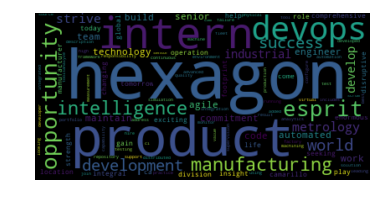

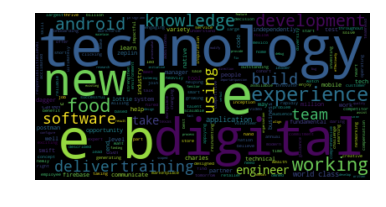

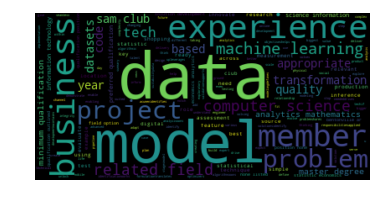

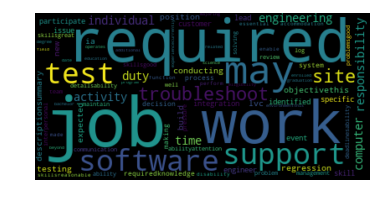

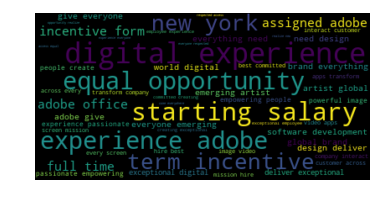

In [640]:
## Visualize data
jobs_list = aggregate.job_title.unique().tolist()
for j in range(0,5):
    job=jobs_list[j]
    # Start with one review:
    text = aggregate[aggregate.job_title == job].iloc[0].description
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

C:\Users\Shabina\.conda\envs\python-cvcourse\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


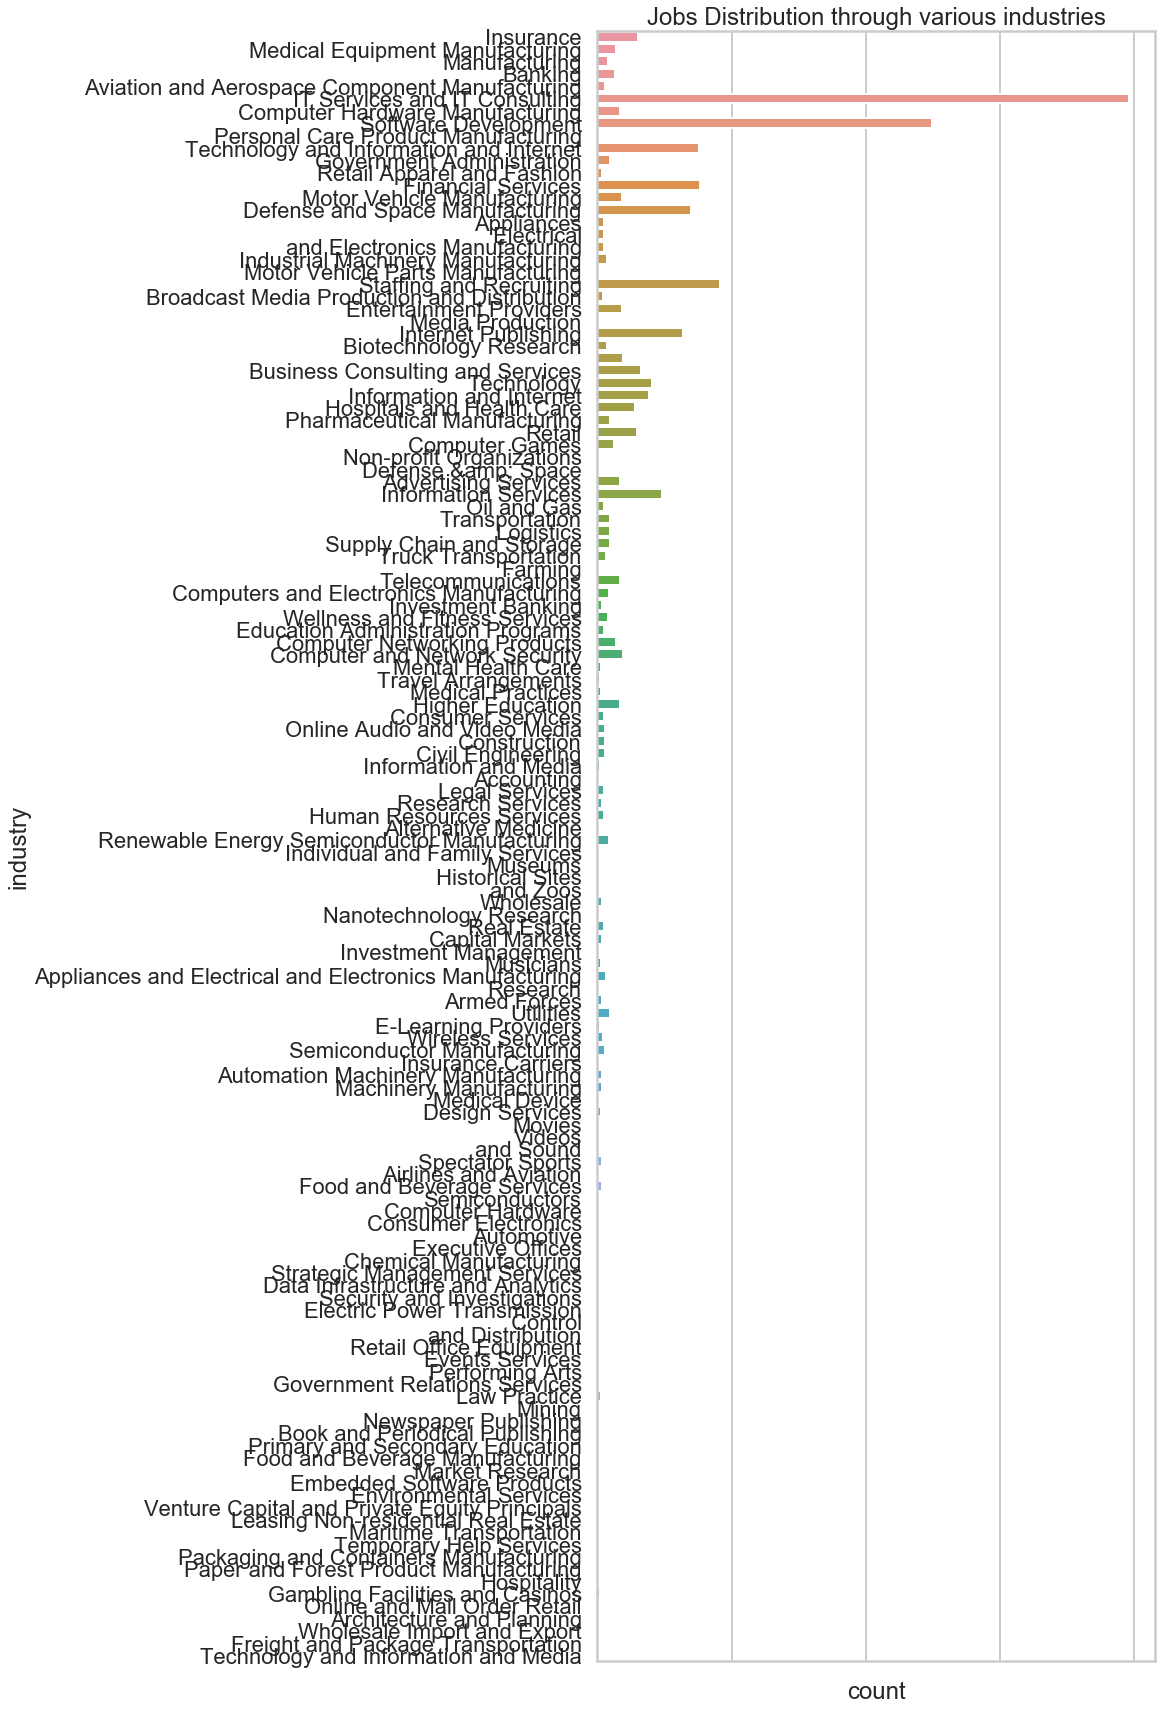

In [652]:
sns.set_context("poster")
sns.set_style("whitegrid")


input_data = visulize_df.groupby(["industry"],as_index=False).agg(jobs = ('job_title', 'count'))
input_data

fig, ax = plt.subplots(figsize=(10, 30))
ax = sns.countplot(y='industry', data=visulize_df)

ax.set_title('Jobs Distribution through various industries')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
fig.show()

C:\Users\Shabina\.conda\envs\python-cvcourse\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


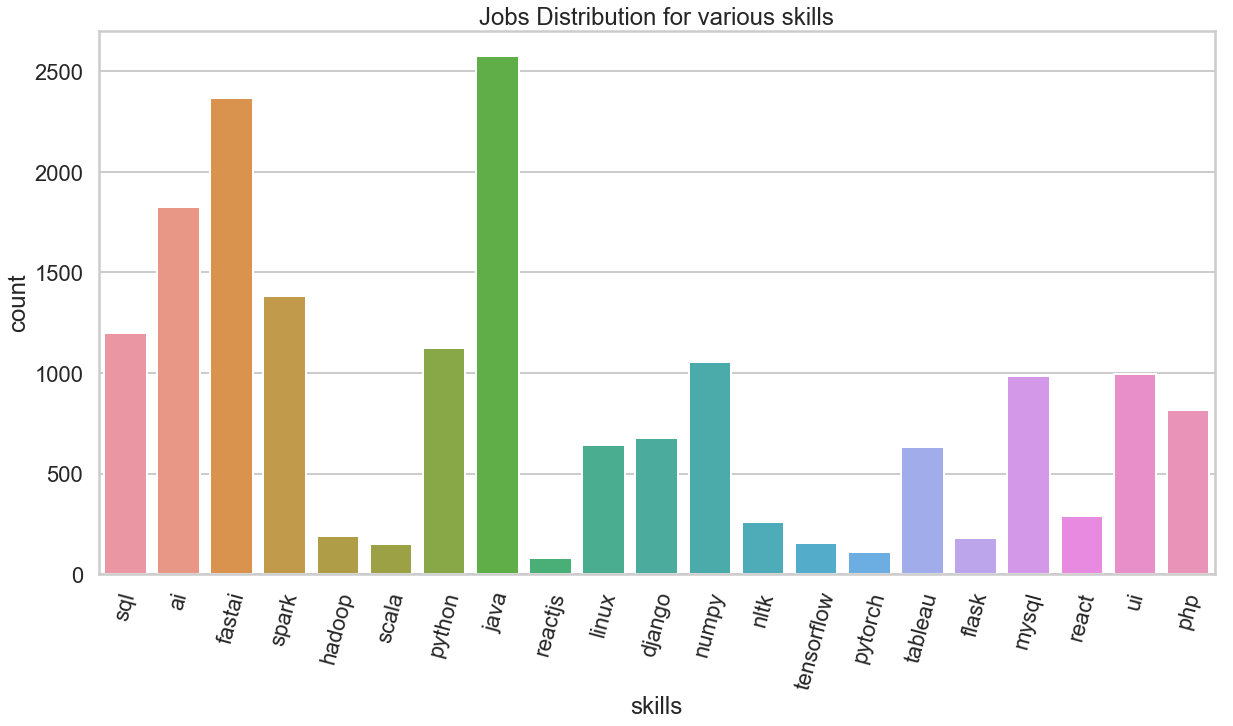

In [653]:
input_data = visulize_df.groupby(["skills"],as_index=False).agg(jobs = ('job_title', 'count'))
input_data

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(x='skills', data=visulize_df)


ax.set_title('Jobs Distribution for various skills')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
fig.show()

In [643]:
fnew_df.describe()

,job_id,skill_id
count,17688.000000,17688.000000
mean,8843.500000,7.682214
std,5106.230116,5.609333
min,0.000000,0.000000
25%,4421.750000,3.000000
50%,8843.500000,7.000000
75%,13265.250000,12.000000
max,17687.000000,20.000000


In [644]:
fnew_df['base_salary_max'].isnull().sum()

0

In [645]:
fnew_df.shape

(17688, 14)

In [646]:
fnew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17688 entries, 0 to 17687
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   job_id                  17688 non-null  int64 
 1   job_title               17688 non-null  object
 2   industry                17688 non-null  object
 3   company                 17688 non-null  object
 4   description             17688 non-null  object
 5   job_locality            17688 non-null  object
 6   job_region              17688 non-null  object
 7   job_post_expiry         17688 non-null  object
 8   education_requirements  17688 non-null  object
 9   base_salary_min         17688 non-null  object
 10  base_salary_max         17688 non-null  object
 11  base_salary_currency    17688 non-null  object
 12  url                     17688 non-null  object
 13  skill_id                17688 non-null  int32 
dtypes: int32(1), int64(1), object(12)
memory usage: 1.8+ M

In [647]:
courses_m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1004
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1005 non-null   object
 1   type          1005 non-null   object
 2   url           1005 non-null   object
 3   description   1005 non-null   object
 4   ratings       1005 non-null   object
 5   recent_views  1005 non-null   object
 6   enrolled      1005 non-null   object
 7   skills        1005 non-null   object
dtypes: object(8)
memory usage: 110.7+ KB
